In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')   # google drive를 google colab에 연결. 처음 실행 시, 인증 필요 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers  #모듈(변수나 함수를 포함)만 불러오기

# BMI 데이터를 읽어 들이고 정규화하기
dir = "/content/gdrive/My Drive/Colab Notebooks/ai/"
df = pd.read_csv(dir + "bmi.csv")

In [ ]:
df

,height,weight,label
0,142,62,fat
1,142,73,fat
2,177,61,normal
3,187,48,thin
4,153,60,fat
...,...,...,...
19995,122,58,fat
19996,193,69,normal
19997,193,37,thin
19998,195,51,thin


In [ ]:
# 몸무게와 키 데이터
df["weight"] /= 100   #normalization
df["height"] /= 200   #normalization
# X = df[["weight", "height"]].to_numpy()
X = df.iloc[:,0:2]

# 레이블
bclass = {"thin":[1,0,0], "normal":[0,1,0], "fat":[0,0,1]}
y = np.empty((20000,3))     # 2000x3 크기의 다차원 벡터 생성
for i, v in enumerate(df["label"]):
    y[i] = bclass[v]        #"thin'이면, y[i]=[1,0,0] 와 같이 할당
    
# 훈련 전용 데이터와 테스트 전용 데이터로 나누기
X_train, y_train = X[0:15000], y[0:15000]
X_test,  y_test  = X[15000:20000], y[15000:20000]

In [ ]:
# 모델 구조 정의하기
model = tf.keras.Sequential()  #순차적 계층화 준비
model.add(layers.Dense(8, input_shape=(2,)))  #입력 2개로부터 전달받는 8개 노드의 layer 생성
model.add(layers.Activation('relu'))  #ReLU 활성화함수 채택
model.add(layers.Dropout(0.1))        #dropout ratio=10% (배치 훈련시 10% arc 무시)

model.add(layers.Dense(4))         #4개 노드의 layer 생성
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(3))
model.add(layers.Activation('softmax')) #분류(classification)을 위해 softmax 함수 사용

# 모델 구축하기
model.compile(
    loss='categorical_crossentropy',  #다중 교차엔트로피
    optimizer="rmsprop",   #최적화 기법 중 하나
    metrics=['accuracy'])  #정확도 측정

In [ ]:
# 데이터 훈련하기
hist = model.fit(
    X_train, y_train,
    batch_size=100,  #100개에 한 번씩 업데이터 실행
    epochs=50,       #훈련 데이터셋을 총 20회 반복 실험. 단, 조기중지될 수 있음
    validation_split=0.2,  
      #validation data 분할 비율. 즉, 15000개 중에서 10%인 1500개를 validation용으로 분할
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)],  
      #'val_loss'를 monitor하여 감소하면 한 번 더(1) 참고 조기중지
    verbose=1)  #전 과정을 화면에 출력(1) 또는 미출력(0) 모드

# 테스트 데이터로 평가하기
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Epoch 1/50
120/120 [==============================] - 1s 3ms/step - loss: 1.0871 - accuracy: 0.3850 - val_loss: 1.0711 - val_accuracy: 0.4117
Epoch 2/50
120/120 [==============================] - 0s 2ms/step - loss: 1.0694 - accuracy: 0.4665 - val_loss: 1.0466 - val_accuracy: 0.5493
Epoch 3/50
120/120 [==============================] - 0s 2ms/step - loss: 1.0440 - accuracy: 0.5240 - val_loss: 1.0113 - val_accuracy: 0.6743
Epoch 4/50
120/120 [==============================] - 0s 2ms/step - loss: 1.0067 - accuracy: 0.5472 - val_loss: 0.9554 - val_accuracy: 0.6733
Epoch 5/50
120/120 [==============================] - 0s 2ms/step - loss: 0.9567 - accuracy: 0.5568 - val_loss: 0.8893 - val_accuracy: 0.6843
Epoch 6/50
120/120 [==============================] - 0s 2ms/step - loss: 0.8924 - accuracy: 0.5769 - val_loss: 0.8132 - val_accuracy: 0.6890
Epoch 7/50
120/120 [==============================] - 0s 2ms/step - loss: 0.8244 - accuracy: 0.6037 - val_loss: 0.7371 - val_accuracy: 0.7583
Epoch 

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

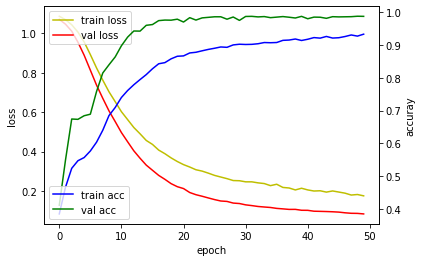

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
activation (Activation)      (None, 8)                 0         
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1

In [ ]:
model.get_weights()

[array([[ 1.0223536 ,  1.0737687 , -0.8858659 ,  1.3050086 , -0.4211131 ,
         -0.0329867 , -0.30703276, -0.6871386 ],
        [-0.43503132, -0.7421807 ,  0.91232455, -0.8176703 , -0.5616946 ,
         -0.3269924 ,  0.04708445,  1.1495359 ]], dtype=float32),
 array([-0.5009788 , -0.3548734 ,  0.30295023, -0.4819903 ,  0.        ,
         0.        ,  0.        ,  0.05962522], dtype=float32),
 array([[-1.1440146 ,  3.3437574 ,  2.3737097 , -1.2519853 ],
        [-1.3345015 ,  4.8031535 ,  4.324382  , -1.0752063 ],
        [ 3.0831962 , -0.14476517, -0.10302718,  3.7442536 ],
        [-1.3004794 ,  4.332766  ,  4.031857  , -0.8268818 ],
        [-0.15072352,  0.2690975 , -0.60837644,  0.37746567],
        [-0.18006736,  0.3844797 , -0.5567467 , -0.42203376],
        [-0.04973394,  0.5667415 ,  0.26129615, -0.2665982 ],
        [ 1.8670868 , -0.17212981, -0.1264664 ,  0.8149983 ]],
       dtype=float32),
 array([0.5617083 , 0.05400251, 0.04259777, 0.50977486], dtype=float32),
 array(

In [ ]:
model.save(dir+"dnn_bmi.h5")
print("Saved model to disk.")

#load and evaluate the saved model
from numpy import loadtxt
from tensorflow.python.keras.models import load_model

#load model
loaded_model = load_model(dir+"dnn_bmi.h5")
model.summary()

score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Saved model to disk.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
activation (Activation)      (None, 8)                 0         
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None,

In [ ]:
# X_test의 예측 클래스 확인하기
y_prob = model.predict(X_test)  # output node의 출력값 확인하기
print(y_prob)

y_class = y_prob.argmax(axis=-1)  # output node의 예측값(class) 확인하기
y_class

[[2.2014974e-07 4.5761559e-02 9.5423824e-01]
 [9.3394190e-01 6.6058069e-02 1.8914887e-12]
 [1.1803458e-03 9.9881554e-01 4.1693779e-06]
 ...
 [9.9663109e-01 3.3688995e-03 7.1712256e-27]
 [9.8948824e-01 1.0511738e-02 1.9530340e-21]
 [7.7211444e-06 7.3224193e-01 2.6775044e-01]]


array([2, 0, 1, ..., 0, 0, 1])

In [ ]:
# 새로운 샘플의 예측 클래스 확인하기
X_new = [80, 175]
X_new[0]/=100; X_new[1]/=200
print(X_new)

y_prob = model.predict([X_new])
y_pred = y_prob.argmax()
print(y_prob, y_pred)

[0.8, 0.875]
[[4.942637e-12 8.250503e-03 9.917495e-01]] 2


In [ ]:
type(X_test)

pandas.core.frame.DataFrame

In [ ]:
X_test.head()

,height,weight
15000,0.690,0.55
15001,0.760,0.36
15002,0.915,0.72
15003,0.990,0.51
15004,0.745,0.47


In [ ]:
X_test.head(5).index.tolist()

[15000, 15001, 15002, 15003, 15004]

In [ ]:
X_test0 = X_test.loc[15000]
print(X_test0); print()

X_test_li = list(X_test0)
y_prob = model.predict([X_test_li])  # model.predict([[0.69, 0.55]])
y_pred = y_prob.argmax()
print(y_prob, y_pred)

height    0.69
weight    0.55
Name: 15000, dtype: float64

[[2.2014974e-07 4.5761559e-02 9.5423824e-01]] 2


In [ ]:
def predict_bmi(X_new):
  y_prob = model.predict([X_new])
  y_pred = y_prob.argmax()
  print(X_new, y_prob, y_pred, sep='\t')

In [ ]:
X_mean = [X_train["height"].mean(), X_train["weight"].mean()]
X_min = [X_train["height"].min(), X_train["weight"].min()]
X_max = [X_train["height"].max(), X_train["weight"].max()]
X_min_max = [X_train["height"].min(), X_train["weight"].max()]
X_max_min = [X_train["height"].max(), X_train["weight"].min()]

predict_bmi(X_mean)
predict_bmi(X_min)
predict_bmi(X_max)
predict_bmi(X_min_max)
predict_bmi(X_max_min)

[0.7999703333333329, 0.5757626666666672]	[[1.7923994e-03 9.9801314e-01 1.9440649e-04]]	1
[0.6, 0.35]	[[0.00074736 0.64003724 0.3592155 ]]	1
[1.0, 0.8]	[[5.1797717e-03 9.9482024e-01 1.4253998e-08]]	1
[0.6, 0.8]	[[6.297377e-14 4.063056e-03 9.959370e-01]]	2
[1.0, 0.35]	[[9.9835807e-01 1.6419510e-03 2.7135495e-30]]	0
